In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import time


population_size = 5


In [16]:
br_poslova = int(input('Broj poslova: ')) #br poslova M
br_masina = int(input('Broj mašina: ')) # br masina N

np.random.seed(2)

processing_time = np.random.randint(10,50, size = (br_masina,br_poslova))
print('processing_time: \n', processing_time)
#vreme obrade na svakoj masini za svaki posao
    # J0 J1 J2 J3 J4 J5
# M0
# M1
# M2


# generisanje inicijalne populacije



population_list=[] #lista gde popunjavamo populaciju
for i in range(population_size): #range(population_size) #trebalo bi populaciju da popunis u skladu sa velicinom poplacijue
    generisana_jedinka=list(np.random.permutation(br_poslova)) #pravimo permutaciju od M poslova(Jobs)
    population_list.append(generisana_jedinka) 
    
populacija = population_list #nama je populacija u stvari lista prioriteta obrade

#Tabela transporta

Mat1 = np.random.randint(1,15, size = (br_masina,br_masina))
Mat2 = np.transpose(Mat1)
for i in range(br_masina):
    for k in range(br_masina):
        if i == k:
            Mat2[i,k] = 0
Vreme_transporta = Mat2 + Mat1

print('transport_time: \n', Vreme_transporta)



Broj poslova: 10
Broj mašina: 3
processing_time: 
 [[25 18 32 28 21 17 44 41 21 31]
 [41 36 30 47 49 13 48 14 49 48]
 [43 13 15 34 14 16 41 29 41 12]]
transport_time: 
 [[ 0  9 20]
 [ 9  0 16]
 [20 16  0]]


In [17]:
# generisanje inicijalne populacije

np.random.seed(2)
random.seed(2)
population_list=[] #lista gde popunjavamo populaciju
for i in range(population_size): #range(population_size) #trebalo bi populaciju da popunis u skladu sa velicinom poplacijue
    generisana_jedinka=list(np.random.permutation(br_poslova)) #pravimo permutaciju od M poslova(Jobs)
    population_list.append(generisana_jedinka) 
    
populacija = population_list #nama je populacija u stvari lista prioriteta obrade
print('inicijalna_populacija: \n', populacija)


masine= []
for i in range(br_masina):
    masine.append(i)
#print('masine: \n', masine)

lista_masina_za_svaki_posao = [] #generisanje spiska masina na kojima se svaki posao treba odraditi

for i in range(0,br_poslova):
    masine_za_posao = random.sample(masine, k = random.randint(2,br_masina))
    lista_masina_za_svaki_posao.append(masine_za_posao)
print('lista_masina_za_svaki_posao: \n', lista_masina_za_svaki_posao)


inicijalna_populacija: 
 [[4, 1, 5, 0, 7, 2, 3, 6, 9, 8], [1, 6, 0, 2, 3, 9, 7, 8, 4, 5], [4, 9, 5, 0, 8, 1, 2, 6, 7, 3], [5, 9, 8, 0, 2, 1, 3, 7, 6, 4], [5, 3, 8, 6, 7, 0, 1, 9, 4, 2]]
lista_masina_za_svaki_posao: 
 [[0, 2], [0, 1, 2], [2, 0], [1, 2], [2, 1, 0], [0, 1], [1, 2, 0], [2, 0], [0, 2], [1, 0]]


In [18]:
def fitness_function(populacija):
    
    funkcija_cilja=[]
    for jedinka in populacija:
        max_vreme_masina = np.zeros(br_masina, dtype=int)
        max_vreme_job = np.zeros(br_poslova, dtype=int)
        for i in range(0,len(masine)):
            #print("redni broj operacije: ", i)
            for job in jedinka:
                if len(lista_masina_za_svaki_posao[job]) <= i:
                    continue
                #print("job", job)    
                trenutna_masina = lista_masina_za_svaki_posao[job][i]
                #print("trenutna masina", lista_masina_za_svaki_posao[job][i])
                trajanje = processing_time[trenutna_masina][job]
                #print("duzina trajanja posla: ",processing_time[trenutna_masina][job])
                slobodno = max(max_vreme_masina[trenutna_masina],max_vreme_job[job])
                #print("Slobodno",slobodno)
                if i<(len(lista_masina_za_svaki_posao[job])-1):
                    transport= Vreme_transporta[lista_masina_za_svaki_posao[job][i]][lista_masina_za_svaki_posao[job][i+1]]
                else:
                    transport=0              
                #print(transport)
                max_vreme_masina[trenutna_masina] = slobodno + trajanje
                max_vreme_job[job] = slobodno + trajanje + transport
                #print("max_vreme_masina",max_vreme_masina, "max_vreme_job", max_vreme_job)
        funkcija_cilja.append(max(max_vreme_masina))
    
    return funkcija_cilja

In [19]:
funkcija_cilja= fitness_function(populacija)
print(funkcija_cilja)

[266, 289, 270, 302, 280]


In [20]:
#turnirska selekcija

def selection(funkcija_cilja):
    
    #random.seed(5)
    clanovi_turnira= 2 #koliko ce jedinki uci na turnir
    
    k = -1
    winner= 1000000
    for i in range(clanovi_turnira):
        j = random.randrange(len(populacija))
        #print("j: ", j)
        if funkcija_cilja[j] < winner:
            winner = funkcija_cilja[j]
            #print("f-ja cilja: ", funkcija_cilja[j])
            k=j
    return k

In [21]:
#CROSSOVER
def crossover (roditelj1, roditelj2):
    
    #np.random.seed(5)
    #print("roditelji: ",roditelj1, roditelj2)
    #srecan_broj= 0.81 #random.random()
    #if srecan_broj<crossover_rate: #PROVERITI OVO, sta vraca i sta treba da pise < ili >!!!
    #    return (list(roditelj1),list(roditelj2))
    cutpoint=list(np.random.choice(len(roditelj1), 2, replace=False)) #biram dva mesta za crossover
    cutpoint.sort()
    #print(cutpoint)

   
    dete1 = np.zeros(len(roditelj1), dtype=int)
    dete2 = np.zeros(len(roditelj2), dtype=int)

    dete1[:][:]=-1
    dete2[:][:]=-1

    dete1[cutpoint[0]:cutpoint[1]] = roditelj1[cutpoint[0]:cutpoint[1]]
    dete2[cutpoint[0]:cutpoint[1]] = roditelj2[cutpoint[0]:cutpoint[1]] # ne ukljucuje desnu poziciju, do nje preslikava

    list_difference1 = [item for item in roditelj2 if item not in dete1]
    list_difference2 = [item for item in roditelj1 if item not in dete2]
    #print("razlike: ",list_difference1,list_difference2)
    poz_zamene_d1=0
    poz_zamene_d2=0 

    for i in range(len(dete1)):
        if dete1[i] == -1:
            dete1[i]=list_difference1[poz_zamene_d1]
            poz_zamene_d1=poz_zamene_d1+1
        if dete2[i] == -1:
            dete2[i]=list_difference2[poz_zamene_d2]
            poz_zamene_d2=poz_zamene_d2+1
    #print("deca: ", dete1, dete2)
    return (list(dete1),list(dete2))

In [22]:
#MUTACIJA
def mutacija (dete):
    
    mutation_rate = 0.1
    #print("pre mutacije: ",dete)
    srecan_broj = random.uniform(0,1)
    if srecan_broj<= mutation_rate:
        indexi= list(np.random.choice(len(dete), 2, replace=False))
        vrednost_na_mestu1 = dete[indexi[0]]
        vrednost_na_mestu2 = dete[indexi[1]]
        
        #print(indexi)
        #print ( vrednost_na_mestu1, vrednost_na_mestu2)
        dete[indexi[0]], dete[indexi[1]] = vrednost_na_mestu2, vrednost_na_mestu1
        
        #print("posle mutacije: ",dete)
    return(dete)

In [23]:
def fitness_za_Gantt(best_jedinka):
    
    funkcija_cilja=[]
    max_vreme_masina = np.zeros(br_masina, dtype=int)
    max_vreme_job = np.zeros(br_poslova, dtype=int)
    lista_masina_za_gantogram=[]
    for i in range(0,len(masine)):
        #print("redni broj operacije: ", i)
        for job in best_jedinka:
            if len(lista_masina_za_svaki_posao[job]) <= i:
                continue
            pomocna_lista_za_gantogram =[] #[M, J, P, K]
            #print("job", job)    
            trenutna_masina = lista_masina_za_svaki_posao[job][i]
            #print("trenutna masina", lista_masina_za_svaki_posao[job][i])
            trajanje = processing_time[trenutna_masina][job]
            #print("duzina trajanja posla: ",processing_time[trenutna_masina][job])
            slobodno = max(max_vreme_masina[trenutna_masina],max_vreme_job[job])
            #print("Slobodno",slobodno)
            pomocna_lista_za_gantogram= [trenutna_masina, job, slobodno, slobodno+trajanje]
            lista_masina_za_gantogram.append(pomocna_lista_za_gantogram)
            #print(pomocna_lista_za_gantogram)
            if i<(len(lista_masina_za_svaki_posao[job])-1):
                transport= Vreme_transporta[lista_masina_za_svaki_posao[job][i]][lista_masina_za_svaki_posao[job][i+1]]
            else:
                transport=0              
            #print(transport)
            max_vreme_masina[trenutna_masina] = slobodno + trajanje
            max_vreme_job[job] = slobodno + trajanje + transport
            #print("max_vreme_masina",max_vreme_masina, "max_vreme_job", max_vreme_job)
    funkcija_cilja.append(max(max_vreme_masina))
    
    return lista_masina_za_gantogram

In [24]:
def Gantt(Lista_podataka,N):
        fig = plt.figure(figsize=(20,10))
        M = ['red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle',
             'Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue',
             'navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle',
             'Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue',
             'navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue','navajowhite','navy', 'sandybrown','red', 'blue', 'yellow', 'orange', 'green', 'moccasin', 'purple', 'pink', 'navajowhite', 'Thistle','Magenta', 'SlateBlue', 'RoyalBlue', 'Aqua', 'floralwhite', 'ghostwhite', 'goldenrod', 'mediumslateblue',
             'navajowhite','navy', 'sandybrown']
        for i in range(len(Lista_podataka)):
            Start_time=Lista_podataka[i][2]
            End_time=Lista_podataka[i][3]
            Job=Lista_podataka[i][1]
            masina = Lista_podataka[i][0]
            plt.barh(masina, width=End_time - Start_time, height=0.8, left=Start_time, \
                     color=M[Job], edgecolor='black')
            plt.text(x=Start_time + ((End_time - Start_time) / 4), y=masina - 0.2, s=Job+1, size=15, fontproperties='Times New Roman')
        plt.yticks(np.arange(N), np.arange(1, N+1), size=20, fontproperties='Times New Roman')
        plt.xticks(np.arange(0, Lista_podataka[i][3]+30,step=round(Lista_podataka[i][3]/5)), size=20, fontproperties='Times New Roman')
        
        
        plt.ylabel("masine", size=20, fontproperties='SimSun')
        plt.xlabel("vreme", size=20, fontproperties='SimSun')
        plt.tick_params(labelsize=20)
        plt.tick_params(direction='in')
        plt.show()

Build finished in 0.6753 seconds


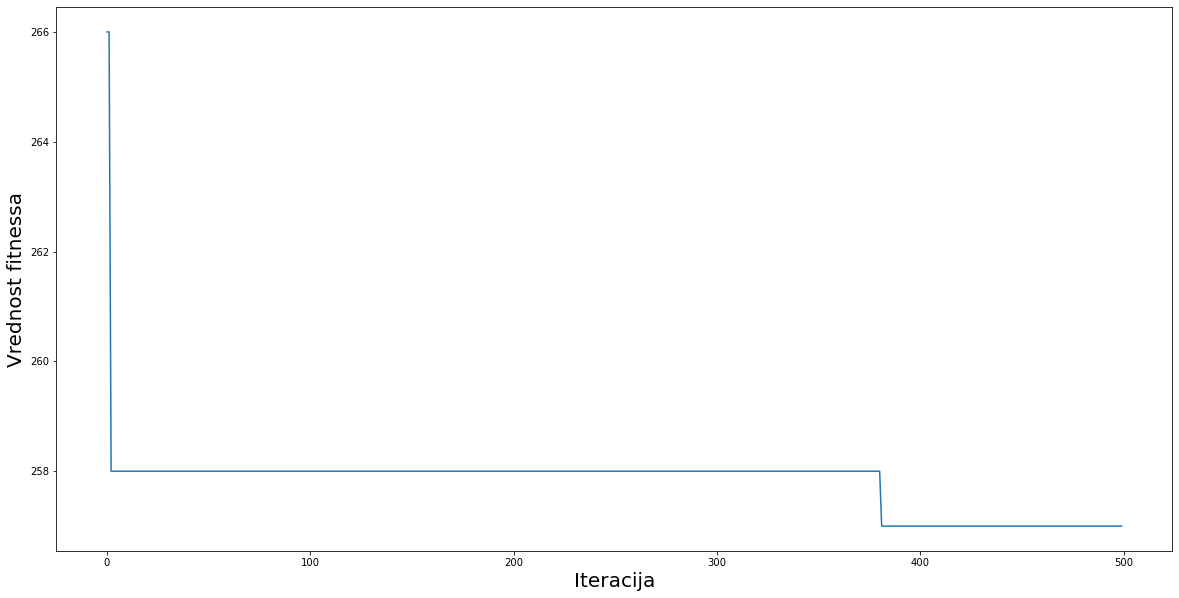

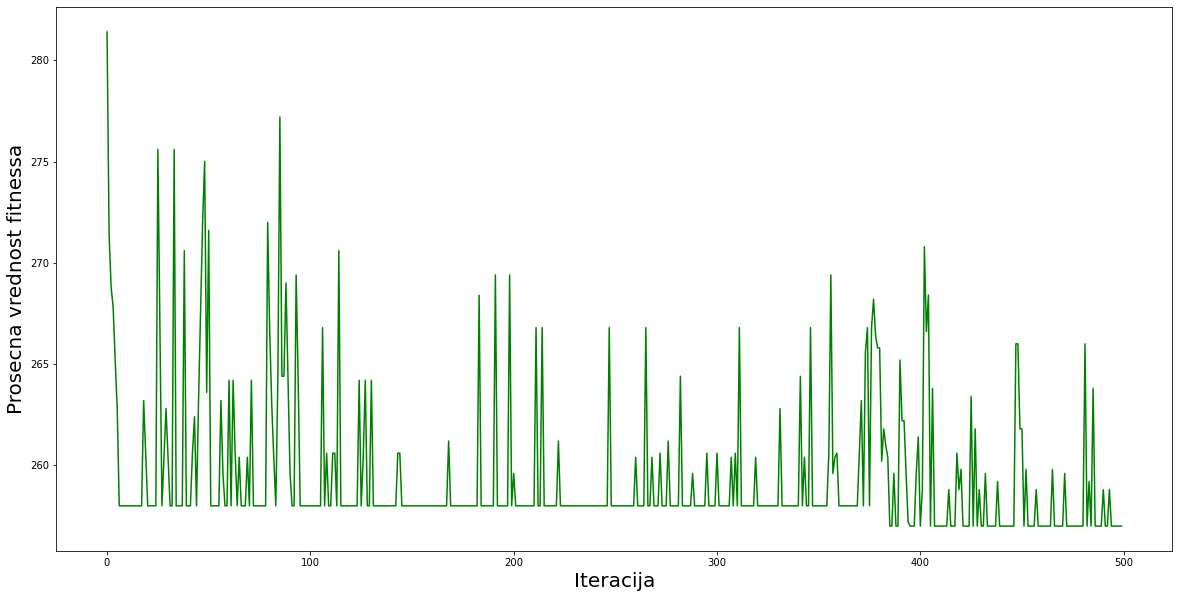

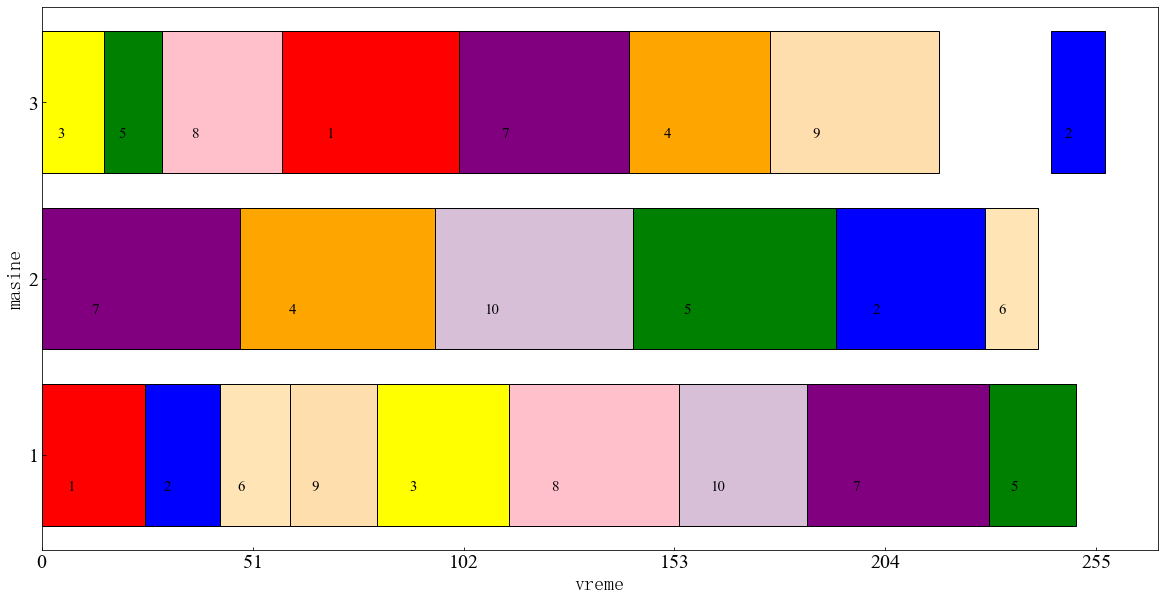

257


In [37]:
#Glavni program
tic = time.perf_counter() # Start Time 
E=1    #broj elitnih jedinki koje se direktno prepisuju u sledecu generaciju
inicijalna_populacija=population_list
broj_iteracija= 500
populacija= population_list
best_fitness_za_grafik=[]
generacija= []
prosecni_fitness_za_grafik=[]


for g in range(broj_iteracija): #broj generacija
    nova_populacija=[]
    
    bez_duplikata = np.unique(populacija, axis=0) #precisti populacijuod duplikata i sortira je nekako
    fitness_bez_duplikata=fitness_function(bez_duplikata) #pozivamo fitnes funkciju za bez_duplikata
    indices = np.argsort(fitness_bez_duplikata) #pronalazi indekse jedinki kao da je bez_duplikata sortirano po fitnesu 
    for i in range(E):
        nova_populacija.append(bez_duplikata[indices[i]]) #prepisivanje n najboljih jedinki (elitizam)
        
    funkcija_cilja=fitness_function(populacija) #pozivamo fitnes funkciju za populaciju
    for i in range(E,len(populacija),2):
        
        izabrani_roditelj1 = selection(funkcija_cilja)
        izabrani_roditelj2 = selection(funkcija_cilja)
        dete1,dete2=crossover(populacija[izabrani_roditelj1],populacija[izabrani_roditelj2])
        dete1mut,dete2mut = mutacija(dete1), mutacija(dete2)
        
        nova_populacija.append(dete1mut)
        nova_populacija.append(dete2mut)
    
    if(len(populacija)< len(nova_populacija)):
        nova_populacija.pop()
        
    populacija = nova_populacija #moze biti zbunjujuce kada se pozovu samostalno populacija i nova_populacija, posto pokazuju iste jedinke
    best_fitness_za_grafik.append(min(funkcija_cilja))
    prosecni_fitness_za_grafik.append(np.average(funkcija_cilja))
    generacija.append(g)
    
toc = time.perf_counter() # End Time
print(f"Build finished in {toc - tic:0.4f} seconds")

fig = plt.figure(figsize=(20,10))
plt.plot(generacija, best_fitness_za_grafik)
plt.xlabel("Iteracija", size = 20)
plt.ylabel("Vrednost fitnessa",size = 20)
plt.show()

fig = plt.figure(figsize=(20,10))
plt.plot(generacija, prosecni_fitness_za_grafik, "g")
plt.xlabel("Iteracija",size = 20)
plt.ylabel("Prosecna vrednost fitnessa",size = 20)

plt.show()    
a= fitness_za_Gantt(nova_populacija[0])
Gantt(a,br_masina)
print(min(funkcija_cilja))


In [28]:
nova_populacija[0]

array([0, 2, 6, 3, 4, 8, 1, 5, 7, 9])

In [29]:
#Kreiranje populacije sa svim permutacijama(Maksimalno do 8 poslova, posle toga preoptereti komp)
tic = time.perf_counter() # Start Time

import itertools

koji_poslovi=[]

for i in range(br_poslova):
    koji_poslovi.append(i)
#print('poslovi: \n', koji_poslovi)

sve_permutacije_objekat= itertools.permutations(koji_poslovi)
sve_permutacije_lista = list (sve_permutacije_objekat)

#print(sve_permutacije_lista)
fitness_lista_svih= fitness_function(sve_permutacije_lista)
print(min(fitness_lista_svih))

toc = time.perf_counter() # End Time
print(f"Build finished in {toc - tic:0.4f} seconds")

print(len(sve_permutacije_lista))

257
Build finished in 262.1784 seconds
3628800


In [30]:
#RECNIK

from collections import Counter

a = dict(Counter(fitness_function(sve_permutacije_lista)))

print (a) #ispis je recnik gde prvi broj predstavlja element koji se ponavlja x puta u listi  "element liste : x puta"

{302: 362636, 315: 288000, 271: 389280, 289: 158244, 285: 118800, 261: 2960, 312: 19440, 258: 118200, 268: 16960, 321: 120928, 280: 149360, 274: 145680, 266: 202044, 281: 179000, 270: 415660, 279: 129120, 291: 40410, 257: 65780, 273: 25360, 307: 54592, 297: 103680, 264: 3560, 303: 10664, 334: 50400, 283: 7230, 324: 2880, 290: 118060, 320: 2848, 286: 115270, 277: 680, 314: 19440, 355: 10080, 284: 112320, 269: 2596, 260: 600, 304: 2848, 299: 4308, 293: 40410, 282: 3400, 306: 5632, 272: 6480, 259: 2960}
